In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm

In [18]:
Truths = np.array([
    [-12.2535, -1.25912],
    [-11.2222, -1.18135],
    [-10.1947, -1.06927],
    [-8.14138, -0.827958],
    [-6.25579, -0.638207],
    [-5.22822, -0.526128],
    [-4.19972, -0.422627],
    [-1.96944, -0.215533],
    [0., 0.],
    [0.940006, 0.120611],
    [1.96944, 0.215533],
    [2.99515, 0.34477],
    [3.85131, 0.439599],
    [4.87888, 0.551678],
    [5.90831, 0.6466],
    [7.96346, 0.870758],
    [10.1891, 1.12074],
    [11.0471, 1.19842]
])

In [ ]:
index = 1 # 17, 10
dummy_result = np.loadtxt(f"/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM/Visualisation/L_Coeff_Convergence/data/L_Coeffs_errors_circle_P:1_AOA:{Truths[index,0]}.txt")

# AOA = 10.1891

## Gathering data

In [ ]:
n_airfoil = np.loadtxt(f"/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM/Visualisation/L_Coeff_Convergence/data/n_airfoil.txt")
n_airfoil = list(map(int, n_airfoil))
ps = np.loadtxt(f"/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM/Visualisation/L_Coeff_Convergence/data/ps.txt")
ps = list(map(int, ps))
results_ellipse = np.empty((len(ps),dummy_result.shape[0],dummy_result.shape[1]))
results_circle = np.empty((len(ps),dummy_result.shape[0],dummy_result.shape[1]))
for i in ps:
    results_circle[i-1] = np.loadtxt(f"/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM/Visualisation/L_Coeff_Convergence/data/L_Coeffs_errors_circle_P:{i}_AOA:{Truths[index,0]}.txt")
    results_ellipse[i-1] = np.loadtxt(f"/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM/Visualisation/L_Coeff_Convergence/data/L_Coeffs_errors_ellipse_P:{i}_AOA:{Truths[index,0]}.txt")

## Circular

In [21]:
error = results_circle[:,0,:]
times = results_circle[:,1,:]

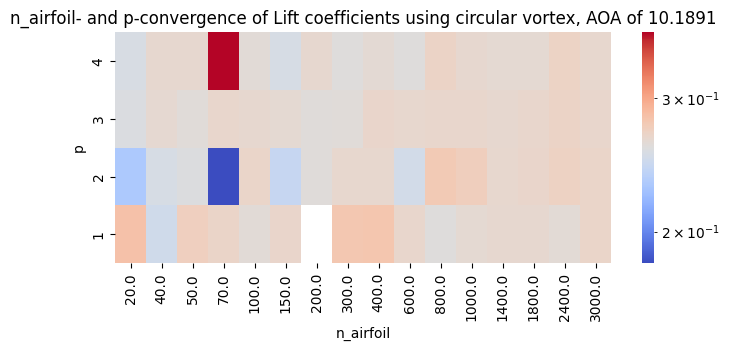

In [22]:
data = pd.DataFrame(error[::-1,:], index=ps[::-1],
                         columns=n_airfoil)

# Lav heatmap
fig, ax = plt.subplots(figsize=(8,3))
sns.heatmap(data, cmap='coolwarm', fmt=".2f", norm=LogNorm(vmin=data.min().min(), vmax=data.max().max()), ax=ax)

plt.title('n_airfoil- and p-convergence of Lift coefficients using circular vortex, AOA of 10.1891')
plt.xlabel('n_airfoil')
plt.ylabel('p')
plt.show()

# Ellipse

In [23]:
error = results_ellipse[:,0,:]
times = results_ellipse[:,1,:]

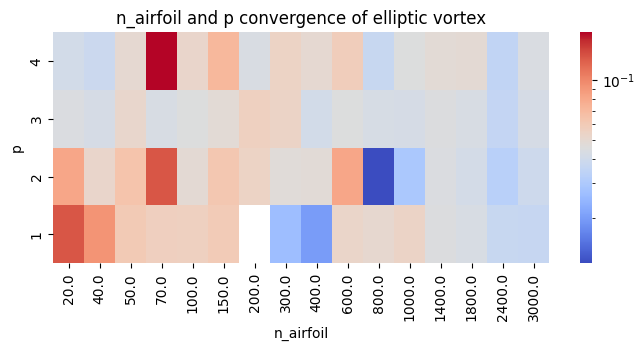

In [26]:
data = pd.DataFrame(error[::-1,:], index=ps[::-1],
                         columns=n_airfoil)

# Lav heatmap
fig, ax = plt.subplots(figsize=(8,3))
sns.heatmap(data, cmap='coolwarm', fmt=".2f", norm=LogNorm(vmin=data.min().min(), vmax=data.max().max()), ax=ax)

plt.title('n_airfoil and p convergence of elliptic vortex')
plt.xlabel('n_airfoil')
plt.ylabel('p')
plt.show()